Num of cores are:  4
Number of results: 100
Total time taken with 1 threads: 6.6031 seconds
Number of results: 100
Total time taken with 2 threads: 5.4031 seconds
Number of results: 100
Total time taken with 3 threads: 7.8317 seconds
Number of results: 100
Total time taken with 4 threads: 6.4046 seconds
Number of results: 100
Total time taken with 5 threads: 6.1392 seconds
Number of results: 100
Total time taken with 6 threads: 6.4828 seconds
Number of results: 100
Total time taken with 7 threads: 6.5887 seconds
Number of results: 100
Total time taken with 8 threads: 7.5548 seconds
Number of results: 100
Total time taken with 9 threads: 5.7658 seconds
Number of results: 100
Total time taken with 10 threads: 5.7281 seconds
Number of results: 100
Total time taken with 11 threads: 5.5632 seconds
Number of results: 100
Total time taken with 12 threads: 5.3423 seconds
Number of results: 100
Total time taken with 13 threads: 5.3381 seconds
Number of results: 100
Total time taken with 14 thre

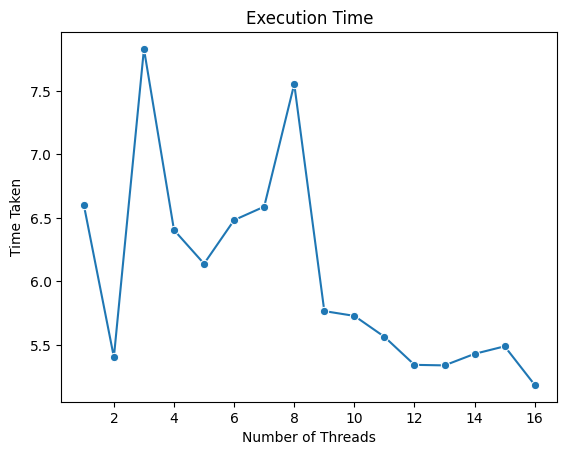

In [1]:
import os
import sys
import platform
import multiprocessing
import threading
import random as r
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


numberOfCores = multiprocessing.cpu_count()
print ("Num of cores are: ", numberOfCores)

#function for multiplying two matrices
def matrix_multiply(mat1, mat2):
    return np.dot(mat1, mat2)

# Function to perform matrix multiplications within a thread
def perform_matrix_multiplications(num_matrices, matrix_size, constant_matrix, results, results_lock):
    for _ in range(num_matrices):
        # Generate a random matrix
        random_matrix = np.random.rand(*matrix_size)
        
        # Perform matrix multiplication
        result = matrix_multiply(random_matrix, constant_matrix)
        
        # Append result to the shared results list using a lock
        with results_lock:
            results.append(result)

def main(num_threads):
    # Define matrix dimensions
    matrix_size = (1000, 1000)
    num_matrices = 100

    # Create random matrices and constant matrix
    constant_matrix = np.random.rand(*matrix_size)

    # List to hold results
    results = []
    results_lock = threading.Lock()  # Lock to safely append results

    # List to hold threads
    threads = []

    # Calculate number of matrices each thread will handle
    matrices_per_thread = num_matrices // num_threads
    remaining_matrices = num_matrices % num_threads

    # Start time measurement
    start_time = time.time()

    # Perform matrix multiplications with specified number of threads
    for _ in range(num_threads):
        # Determine number of matrices this thread will handle
        if remaining_matrices > 0:
            num_matrices_this_thread = matrices_per_thread + 1
            remaining_matrices -= 1
        else:
            num_matrices_this_thread = matrices_per_thread

        # Create and start a new thread
        thread = threading.Thread(
            target=perform_matrix_multiplications,
            args=(num_matrices_this_thread, matrix_size, constant_matrix, results, results_lock),
        )
        threads.append(thread)
        thread.start()

    # Wait for all threads to complete
    for thread in threads:
        thread.join()

    # End time measurement
    end_time = time.time()

    # Calculate total time taken
    total_time = end_time - start_time

    print(f"Number of results: {len(results)}")
    print(f"Total time taken with {num_threads} threads: {total_time:.4f} seconds")
    return total_time

num_threads=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
tt=[]
for i in range(0,len(num_threads)):
    tt.append(main(num_threads[i]))

sns.lineplot(x=num_threads, y=tt, marker='o')
plt.title('Execution Time')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken')
plt.show()